# ***Projeto 1 - Ciência dos Dados***
###### Kamila Addel Wansa - 2C Engenharia

### ***Análise do desenvolvimento dos países relacionado a CEI (Central European Initiative)***


**Introdução**

Esse projeto procura compreender melhor a situação dos países membros da CEI, fundade em 1989, e as melhorias que o pertencimento a organização pode fornecer. 

A organização da Iniciativa da Europa Central tem como principais metas assegurar:
- Boa governância 
- Crescimento econômico
- **Desenvolvimento da educação, ciência e tecnologia**
- Proteção ambiental
- Cooperação intercultural
- Liberdade da mídia

Para o projeto, vamos selecionar uma dessas metas e responder à pergunta: **Como a entrada dos países na CEI influenciou o desenvolvimento da educação, ciência e tecnologia?**

**Desenvolvimento das hipóteses**

Conforme houve a implementação das ações da organização em questão para o desenvolvimento da educação, ciência e tecnologia, a hipóteses é a de que a média de anos estudando da população desses países aumente, e consequentemente, as taxas de desemprego caiam. Para isso, iremos analisar a correlação entre esses dados ao longo dos anos.
 
"Science Diplomacy is emerging as a useful tool to build bridges and strengthen relations. The CEI aims at enhancing science education in its region as a contribution to the consolidation of the European Research Area (ERA). In order to increase employability, special attention will be paid to the life-long learning concept and to the implementation of EU educational and employment policies in non-EU CEI Member States. Education and training will also address groups at risk of exclusion to integrate them into the labour market, while focusing on youth unemployment as a growing problem the CEI region is facing."- descrição do site da CEI

**Referências Bibliograficas**:

https://databank.worldbank.org/indicator/SP.POP.TOTL/1ff4a498/Popular-Indicators#

https://www.gapminder.org/fw/four-regions/

https://www.gapminder.org/data/

https://www.cei.int/scientific-cooperation-education-training

# **Como que a CEI interfere no desenvolvimento da educação e queda do desemprego?**

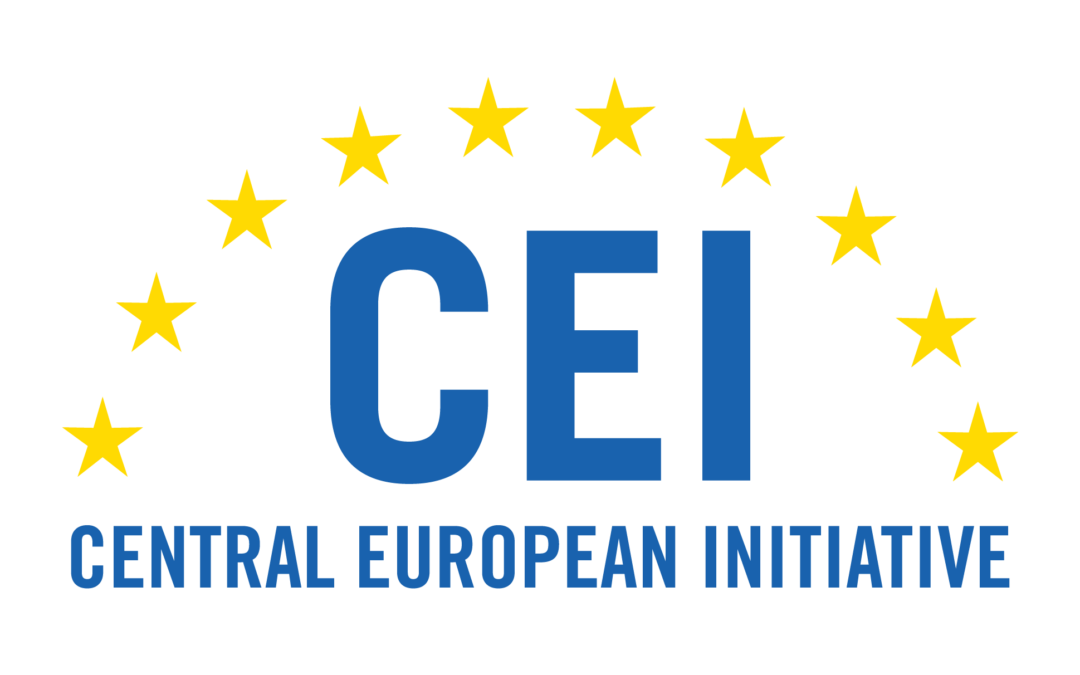 

## Importando as bases de dados

In [2]:
#Importando as bibliotecas 

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import math as math
from scipy import stats
import matplotlib.pyplot as plt

Leitura dos arquivos do Gapminder em excel:

In [3]:
CEI = pd.read_excel("CEI & Regions.xlsx")
Homens = pd.read_excel("mean_years_in_school_men_25_years_and_older.xlsx")
Mulheres = pd.read_excel("mean_years_in_school_women_25_years_and_older.xlsx")
Desemprego = pd.read_excel("aged_15plus_unemployment_rate_percent.xlsx")

**Variáveis**
- Homens: Referente a média de anos estudados por homens nos países
- Mulheres: Referente a média de anos estudados por mulheres nos países
- Desemprego: Referente a taxa de desemprego dos países

In [4]:
Homens.head()

country  1970  1971  1972  1973  1974  1975  1976  1977  1978  \
0          Afghanistan   0.7   0.7   0.8   0.8   0.8   0.9   0.9   0.9   1.0   
1              Albania   5.1   5.2   5.3   5.5   5.6   5.7   5.9   6.0   6.1   
2              Algeria   0.9   0.9   1.0   1.1   1.1   1.2   1.2   1.3   1.4   
3               Angola   1.4   1.5   1.5   1.6   1.7   1.7   1.8   1.9   2.0   
4  Antigua and Barbuda   7.0   7.1   7.2   7.4   7.5   7.6   7.8   7.9   8.1   

   ...   2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  
0  ...    2.1   2.1   2.2   2.3   2.3   2.4   2.4   2.5   2.6   2.6  
1  ...    9.1   9.2   9.4   9.5   9.6   9.8   9.9  10.0  10.1  10.2  
2  ...    3.7   3.8   3.9   4.0   4.1   4.3   4.4   4.5   4.6   4.7  
3  ...    4.0   4.1   4.3   4.4   4.5   4.6   4.7   4.9   5.0   5.1  
4  ...   11.0  11.1  11.2  11.3  11.4  11.5  11.5  11.6  11.7  11.8  

[5 rows x 41 columns]

In [5]:
Desemprego.head()

country  1947  1948  1949  1950  1951  1952  1953  1954  1955  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2008  2009   2010   2011   2012   2013  2014  2015  2016  2017  
0  ...    2.49   NaN    NaN    NaN   1.69    NaN   NaN   NaN   NaN   NaN  
1  ...   13.10  13.7  14.10  13.50  13.40  15.90  17.5  17.1  15.2  13.8  
2  ...   11.30  10.2   9.96   9.96  11.00   9.82  10.2  11.2  10.2  13.6  
3  ...     NaN   NaN   9.43  16.80    NaN    NaN   NaN   NaN   NaN   NaN  
4  ...     NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN  

[5 rows x 72 columns]

**Selecionando os anos de 2000, 2005 e 2009 para análise**

In [6]:
Homens_2009 = Homens.loc[:, ["country", 2009]]
Mulheres_2009 = Mulheres.loc[:, ["country", 2009]]
Desemprego_2009 = Desemprego.loc[:, ["country", 2009]]

Homens_2005 = Homens.loc[:, ["country", 2005]]
Mulheres_2005 = Mulheres.loc[:, ["country", 2005]]
Desemprego_2005 = Desemprego.loc[:, ["country", 2005]]


Homens_2000 = Homens.loc[:, ["country", 2000]]
Mulheres_2000 = Mulheres.loc[:, ["country", 2000]]
Desemprego_2000 = Desemprego.loc[:, ["country", 2000]]

In [7]:
Desemprego_2005.tail()

country  2005
181  Venezuela  10.7
182    Vietnam   NaN
183      Yemen   NaN
184     Zambia  15.9
185   Zimbabwe   NaN

In [8]:
#Criando o índice de cada variável

CEI_idx = CEI.set_index("country")

Homens_2009_idx = Homens_2009.set_index("country")
Mulheres_2009_idx = Mulheres_2009.set_index ("country")
Desemprego_2009_idx = Desemprego_2009.set_index ("country")

Homens_2005_idx = Homens_2005.set_index("country")
Mulheres_2005_idx = Mulheres_2005.set_index ("country")
Desemprego_2005_idx = Desemprego_2005.set_index ("country")

Homens_2000_idx = Homens_2000.set_index("country")
Mulheres_2000_idx = Mulheres_2000.set_index ("country")
Desemprego_2000_idx = Desemprego_2000.set_index ("country")

Juntando os diferentes dados do anos:

In [9]:
data0 = Homens_2009_idx.join(Mulheres_2009_idx, how='inner',lsuffix='_Anos Educação Homens', rsuffix='_Anos Educação Mulheres')
data00 = data0.join(Desemprego_2009_idx)
datafinal_2009 = data00.join(CEI_idx)
datafinal_2009 = datafinal_2009.rename(index=str, columns={2009:"2009_Taxa de Desemprego"})

data1 = Homens_2005_idx.join(Mulheres_2005_idx, how='inner',lsuffix='_Anos Educação Homens', rsuffix='_Anos Educação Mulheres')
data11 = data1.join(Desemprego_2005_idx)
datafinal_2005 = data11.join(CEI_idx)
datafinal_2005 = datafinal_2005.rename(index=str, columns={2005:"2005_Taxa de Desemprego"})

data2 = Homens_2000_idx.join(Mulheres_2000_idx, how='inner',lsuffix='_Anos Educação Homens', rsuffix='_Anos Educação Mulheres')
data22 = data2.join(Desemprego_2000_idx)
datafinal_2000 = data22.join(CEI_idx)
datafinal_2000 = datafinal_2000.rename(index=str, columns={2000:"2000_Taxa de Desemprego"})


In [10]:
datafinal_2009.head()

2009_Anos Educação Homens  2009_Anos Educação Mulheres  \
country                                                                       
Afghanistan                                2.6                          0.4   
Albania                                   10.2                          9.4   
Algeria                                    4.7                          4.2   
Angola                                     5.1                          2.8   
Antigua and Barbuda                       11.8                         12.2   

                     2009_Taxa de Desemprego        region  CEI  
country                                                          
Afghanistan                              NaN          Asia    0  
Albania                                 13.7        Europe    1  
Algeria                                 10.2        Africa    0  
Angola                                   NaN        Africa    0  
Antigua and Barbuda                      NaN  The Americas    0

In [11]:
#Paises da Europa membros da CEI:
paises_CEI_2009 = datafinal_2009.loc[(datafinal_2009.region=='Europe') & (datafinal_2009.CEI==1)]
paises_CEI_2005 = datafinal_2005.loc[(datafinal_2005.region=='Europe') & (datafinal_2005.CEI==1)]
paises_CEI_2000 = datafinal_2000.loc[(datafinal_2000.region=='Europe') & (datafinal_2000.CEI==1)]

#Paises da Europa não membros da CEI:
paises_fora_2009 = datafinal_2009.loc[(datafinal_2009.region=='Europe') & (datafinal_2009.CEI==0)]
paises_fora_2005 = datafinal_2005.loc[(datafinal_2005.region=='Europe') & (datafinal_2005.CEI==0)]
paises_fora_2000 = datafinal_2000.loc[(datafinal_2000.region=='Europe') & (datafinal_2000.CEI==0)]

In [12]:
paises_fora_2009

2009_Anos Educação Homens  2009_Anos Educação Mulheres  \
country                                                                  
Armenia                              11.3                         11.3   
Azerbaijan                           12.1                         11.3   
Belgium                              12.1                         11.9   
Cyprus                               12.3                         11.8   
Denmark                              12.8                         12.8   
Estonia                              11.1                         11.7   
Finland                              11.8                         12.3   
France                               10.5                         10.5   
Georgia                              12.5                         12.5   
Germany                              12.4                         12.0   
Greece                               10.7                         10.1   
Ireland                              11.2                         11.5   
Latvia                               12.0                         12.9   
Lithuania                            12.3                         12.5   
Luxembourg                           11.6                         11.0   
Netherlands                          11.8                         11.4   
Norway                               13.6                         13.6   
Portugal                              7.6                          7.7   
Russia                               12.7                         12.9   
Spain                                 9.0                          9.0   
Sweden                               12.4                         12.8   
Switzerland                          13.5                         12.6   
Turkey                                8.2                          5.8   
United Kingdom                       13.0                         13.0   

                2009_Taxa de Desemprego  region  CEI  
country                                               
Armenia                             NaN  Europe    0  
Azerbaijan                         5.74  Europe    0  
Belgium                            7.91  Europe    0  
Cyprus                             5.36  Europe    0  
Denmark                            6.01  Europe    0  
Estonia                           13.50  Europe    0  
Finland                            8.25  Europe    0  
France                             8.74  Europe    0  
Georgia                             NaN  Europe    0  
Germany                            7.74  Europe    0  
Greece                             9.62  Europe    0  
Ireland                           12.60  Europe    0  
Latvia                            17.50  Europe    0  
Lithuania                         13.80  Europe    0  
Luxembourg                         5.12  Europe    0  
Netherlands                        3.41  Europe    0  
Norway                             3.10  Europe    0  
Portugal                           9.43  Europe    0  
Russia                             8.30  Europe    0  
Spain                             17.90  Europe    0  
Sweden                             8.35  Europe    0  
Switzerland                        4.12  Europe    0  
Turkey                            12.60  Europe    0  
United Kingdom                     7.54  Europe    0

In [13]:
paises_CEI_2009

2009_Anos Educação Homens  \
country                                             
Albania                                      10.2   
Austria                                      11.8   
Belarus                                      11.8   
Bosnia and Herzegovina                        9.4   
Bulgaria                                     11.8   
Croatia                                      11.1   
Czech Republic                               13.7   
Hungary                                      11.3   
Italy                                        10.6   
Macedonia, FYR                               10.8   
Moldova                                      11.3   
Montenegro                                   11.7   
Poland                                       12.4   
Romania                                      12.2   
Serbia                                       10.8   
Slovak Republic                              12.8   
Slovenia                                     12.0   
Ukraine                                      12.1   

                        2009_Anos Educação Mulheres  2009_Taxa de Desemprego  \
country                                                                        
Albania                                         9.4                    13.70   
Austria                                        11.0                     5.30   
Belarus                                        11.7                      NaN   
Bosnia and Herzegovina                          7.5                    24.10   
Bulgaria                                       12.0                     6.82   
Croatia                                        10.8                     9.20   
Czech Republic                                 13.3                     6.66   
Hungary                                        11.1                    10.00   
Italy                                          10.2                     7.75   
Macedonia, FYR                                  9.6                    32.20   
Moldova                                        11.2                     6.40   
Montenegro                                     10.6                    19.10   
Poland                                         12.4                     8.17   
Romania                                        11.5                     6.86   
Serbia                                         10.0                    16.10   
Slovak Republic                                12.1                    12.00   
Slovenia                                       11.7                     5.86   
Ukraine                                        12.2                     8.84   

                        region  CEI  
country                              
Albania                 Europe    1  
Austria                 Europe    1  
Belarus                 Europe    1  
Bosnia and Herzegovina  Europe    1  
Bulgaria                Europe    1  
Croatia                 Europe    1  
Czech Republic          Europe    1  
Hungary                 Europe    1  
Italy                   Europe    1  
Macedonia, FYR          Europe    1  
Moldova                 Europe    1  
Montenegro              Europe    1  
Poland                  Europe    1  
Romania                 Europe    1  
Serbia                  Europe    1  
Slovak Republic         Europe    1  
Slovenia                Europe    1  
Ukraine                 Europe    1

In [14]:
paises_CEI_2009.describe()

2009_Anos Educação Homens  2009_Anos Educação Mulheres  \
count                  18.000000                    18.000000   
mean                   11.544444                    11.016667   
std                     0.995414                     1.345690   
min                     9.400000                     7.500000   
25%                    10.875000                    10.300000   
50%                    11.750000                    11.150000   
75%                    12.075000                    11.925000   
max                    13.700000                    13.300000   

       2009_Taxa de Desemprego   CEI  
count                17.000000  18.0  
mean                 11.709412   1.0  
std                   7.388330   0.0  
min                   5.300000   1.0  
25%                   6.820000   1.0  
50%                   8.840000   1.0  
75%                  13.700000   1.0  
max                  32.200000   1.0

In [15]:
paises_fora_2009.describe()

2009_Anos Educação Homens  2009_Anos Educação Mulheres  \
count                  24.000000                    24.000000   
mean                   11.604167                    11.454167   
std                     1.516139                     1.803132   
min                     7.600000                     5.800000   
25%                    11.175000                    11.225000   
50%                    12.050000                    11.850000   
75%                    12.425000                    12.650000   
max                    13.600000                    13.600000   

       2009_Taxa de Desemprego   CEI  
count                22.000000  24.0  
mean                  8.938182   0.0  
std                   4.171041   0.0  
min                   3.100000   0.0  
25%                   5.807500   0.0  
50%                   8.275000   0.0  
75%                  11.855000   0.0  
max                  17.900000   0.0

## Histogramas 

**Histograma da Média de Anos de Educação nos países da CEI**


Histograma da Média de Anos de Educação nos países europeus da CEI ao longo dos anos

Mediana 2000: 10.8
Média 2000:  10.627777777777778

Mediana 2005: 11.4
Média 2005:  11.172222222222224

Mediana 2009: 11.75
Média 2009:  11.544444444444444


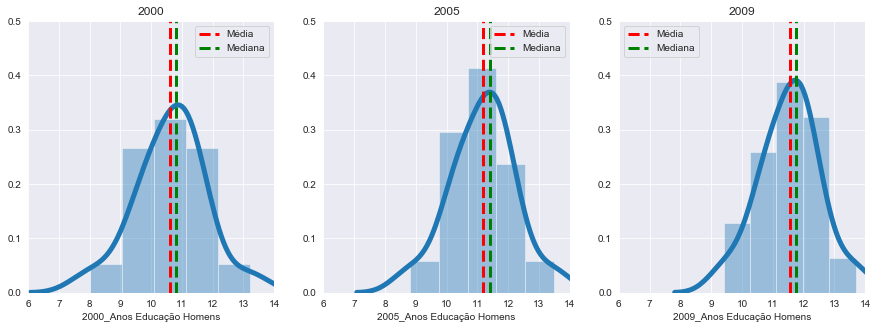

In [59]:
print()
print("Histograma da Média de Anos de Educação nos países europeus da CEI ao longo dos anos")

f= plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(paises_CEI_2000["2000_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_CEI_2000["2000_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2000["2000_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2000")
print()
print("Mediana 2000:", paises_CEI_2000["2000_Anos Educação Homens"].median())
print("Média 2000: ", paises_CEI_2000["2000_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

plt.subplot(132)
sns.distplot(paises_CEI_2005["2005_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_CEI_2005["2005_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2005["2005_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2005")
print()
print("Mediana 2005:", paises_CEI_2005["2005_Anos Educação Homens"].median())
print("Média 2005: ", paises_CEI_2005["2005_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

plt.subplot(133)
sns.distplot(paises_CEI_2009["2009_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_CEI_2009["2009_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2009["2009_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2009")
print()
print("Mediana 2009:", paises_CEI_2009["2009_Anos Educação Homens"].median())
print("Média 2009: ", paises_CEI_2009["2009_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

Podemos perceber analisando os histogramas acima que houve um deslocamento tanto da mediana quanto da média para a direita, já que começam entre 10 e 11 anos e termina entre 11 e 12. A moda também está aumentando, já que o valor que é mais frequente também tem a sua unidade aumentada. Dessa forma se pode concluir que os anos de estudo por pessoa dos países memebros da organização CEI, vêm aumentando conforme o passar dos anos. Percebemos três histogramas que apresentam bastante simetria, já que a média se aproxima bastante da mediana, consequentemente conseguimos afirmar que  pessoas tiveram um aumento na média de anos estudando ao longo dos anos, e além disso, podemos utilizar o valor da média como um bom parâmetro para analisar esses índices.

**Histograma da Média de Anos de Educação nos países fora da CEI**


Histograma da Média de Anos de Educação nos países europeus FORA da CEI ao longo dos anos

Mediana 2000: 11.1
Média 2000:  10.70833333333333

Mediana 2005: 11.649999999999999
Média 2005:  11.233333333333334

Mediana 2009: 12.05
Média 2009:  11.604166666666664


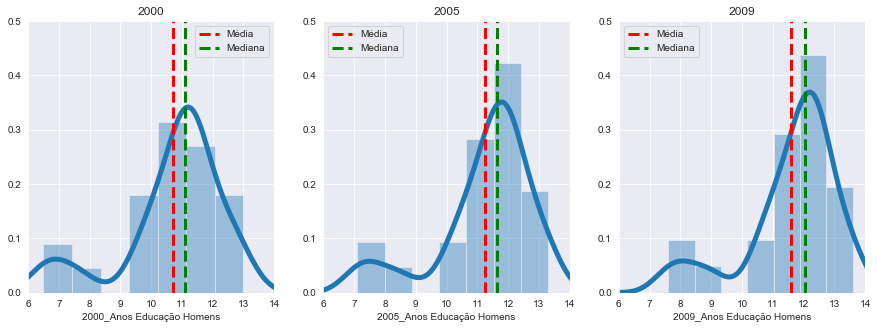

In [64]:
print()
print("Histograma da Média de Anos de Educação nos países europeus FORA da CEI ao longo dos anos")
f= plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(paises_fora_2000["2000_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_fora_2000["2000_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2000["2000_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2000")
print()
print("Mediana 2000:", paises_fora_2000["2000_Anos Educação Homens"].median())
print("Média 2000: ", paises_fora_2000["2000_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

plt.subplot(132)
sns.distplot(paises_fora_2005["2005_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_fora_2005["2005_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2005["2005_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2005")
print()
print("Mediana 2005:", paises_fora_2005["2005_Anos Educação Homens"].median())
print("Média 2005: ", paises_fora_2005["2005_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

plt.subplot(133)
sns.distplot(paises_fora_2009["2009_Anos Educação Homens"], hist = True, kde = True, kde_kws = {'linewidth': 5})
plt.axvline(paises_fora_2009["2009_Anos Educação Homens"].mean(), color='r', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2009["2009_Anos Educação Homens"].median(), color='g', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(6,14)
plt.ylim(0,0.5)
plt.title("2009")
print()
print("Mediana 2009:", paises_fora_2009["2009_Anos Educação Homens"].median())
print("Média 2009: ", paises_fora_2009["2009_Anos Educação Homens"].mean())
plt.legend()
plt.grid(True)

Analisando os histogramas de educação dos países não pertencentes a CEI, percebemos que assim como os países da CEI, houve um deslocamento tanto da mediana quanto da média, quanto da moda para a direita, que também estavam no ano de 2000 entre 10 e 11 e terminaram no ano de 2009 entre 11 e 12 anos. Além disso, por mais que sutil, também é possivel observar uma maior separação entre a média e a mediana, de forma que a mediana, representada pela reta verde, aparenta cada vez um valor maior do que a média, mostrando uma tendência à assimetria a esquerda, na qual conseguimos afirmar que mais pessoas tiveram um aumento na média de anos estudando.

**Histograma da Taxa de Desemprego nos países da CEI**


Histograma da Taxa de Desemprego nos países europeus da CEI ao longo dos anos

Mediana 2000: 10.8
Média 2000:  11.166153846153843

Mediana 2005: 7.93
Média 2005:  13.448666666666666

Mediana 2009: 8.84
Média 2009:  11.709411764705884


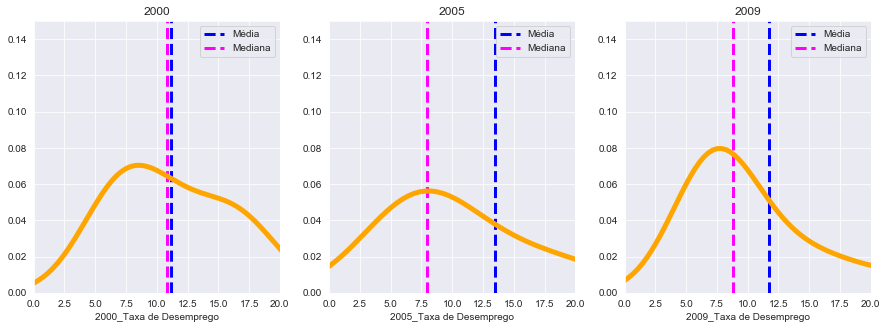

In [67]:
print()
print("Histograma da Taxa de Desemprego nos países europeus da CEI ao longo dos anos")
f= plt.figure(figsize=(15,5))

plt.subplot(131)
plt.axvline(paises_CEI_2000["2000_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2000["2000_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
sns.distplot(paises_CEI_2000["2000_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= 'orange')
plt.title("2000")
print()
print("Mediana 2000:", paises_CEI_2000["2000_Taxa de Desemprego"].median())
print("Média 2000: ", paises_CEI_2000["2000_Taxa de Desemprego"].mean())
plt.legend()
plt.grid(True)

plt.subplot(132)
plt.axvline(paises_CEI_2005["2005_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2005["2005_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
plt.title("2005")
print()
print("Mediana 2005:", paises_CEI_2005["2005_Taxa de Desemprego"].median())
print("Média 2005: ", paises_CEI_2005["2005_Taxa de Desemprego"].mean())
sns.distplot(paises_CEI_2005["2005_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= 'orange')
plt.legend()
plt.grid(True)

plt.subplot(133)
plt.axvline(paises_CEI_2009["2009_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_CEI_2009["2009_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
plt.title("2009")
print()
print("Mediana 2009:", paises_CEI_2009["2009_Taxa de Desemprego"].median())
print("Média 2009: ", paises_CEI_2009["2009_Taxa de Desemprego"].mean())
sns.distplot(paises_CEI_2009["2009_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= 'orange')
plt.legend()
plt.grid(True)

Já no caso do desemprego, para que a hipóteses inicial pudesse ser comprovada, o oposto do que ocorre com a média dos anos de educação por pessoa deveria acontecer, ou seja, conforme o passar dos anos como membro da organização em questão, o histograma apresentaria cada vez mais uma tendência pela assimetria a direita, na qual a média é maior do que a mediana, e consequentemente menos pessoas estariam desempregadas. Pela análise das curvas dos histogramas ao longo dos anos, percebemos que essa hipótese de fato ocorre, já que em 2000 os valores de média e mediana estão muito mais aproximadas do que em 2005 e 2009. Em 2005 provalvente ocorreu algum outro fator externo, que fez com que a média de desemprego fosse bastante aumentada enquanto a a mediana caisse. De forma que se pode concluir que por mais que a moda esteja em um valor de desemprego relativamente pequena, aproximadamente 7.5, que se aproxima bastante da mediana, também há bastante países com taxas mais altas de desemprego. Já em 2009 conseguimos perceber uma assimetria a direita mais acentuada e uma queda na média da taxa de desemprego com relação a 2005, mostrando novamente que houve evolução.  

**Histograma da Taxa de Desemprego nos países fora da CEI**


Histograma da Taxa de Desemprego nos países europeus FORA da CEI ao longo dos anos

Mediana 2000: 6.545
Média 2000:  7.865

Mediana 2005: 7.535
Média 2005:  7.242727272727273

Mediana 2009: 8.275
Média 2009:  8.93818181818182


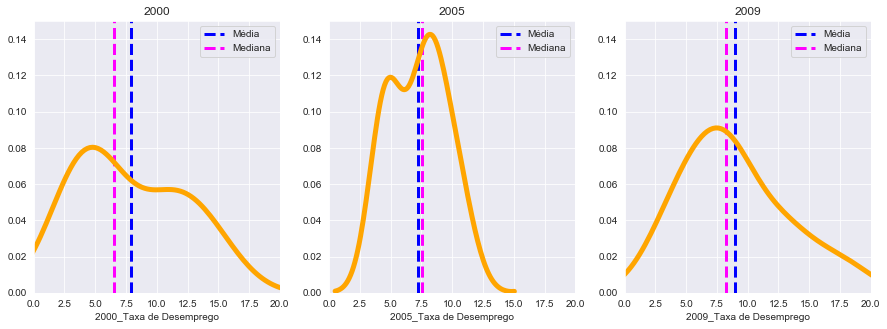

In [69]:
print()
print("Histograma da Taxa de Desemprego nos países europeus FORA da CEI ao longo dos anos")
f= plt.figure(figsize=(15,5))
plt.subplot(131)
plt.axvline(paises_fora_2000["2000_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2000["2000_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
plt.title("2000")
print()
print("Mediana 2000:", paises_fora_2000["2000_Taxa de Desemprego"].median())
print("Média 2000: ", paises_fora_2000["2000_Taxa de Desemprego"].mean())
sns.distplot(paises_fora_2000["2000_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= "orange")
plt.legend()
plt.grid(True)

plt.subplot(132)
plt.axvline(paises_fora_2005["2005_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2005["2005_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
plt.title("2005")
print()
print("Mediana 2005:", paises_fora_2005["2005_Taxa de Desemprego"].median())
print("Média 2005: ", paises_fora_2005["2005_Taxa de Desemprego"].mean())
sns.distplot(paises_fora_2005["2005_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= "orange")
plt.legend()
plt.grid(True)

plt.subplot(133)
plt.axvline(paises_fora_2009["2009_Taxa de Desemprego"].mean(), color='blue', linestyle='dashed', linewidth=3, label= "Média")
plt.axvline(paises_fora_2009["2009_Taxa de Desemprego"].median(), color='magenta', linestyle='dashed', linewidth=3, label= "Mediana")
plt.xlim(0,20)
plt.ylim(0,0.15)
plt.title("2009")
print()
print("Mediana 2009:", paises_fora_2009["2009_Taxa de Desemprego"].median())
print("Média 2009: ", paises_fora_2009["2009_Taxa de Desemprego"].mean())
sns.distplot(paises_fora_2009["2009_Taxa de Desemprego"], hist = False, kde = True, kde_kws = {'linewidth': 5}, color= "orange")
plt.legend()
plt.grid(True)
sns.set_style('darkgrid')


No caso dos países não pertencentes a CEI, as curvas possuem características um pouco distintas, por mais que nos anos de 2000 e 2009 percebemos uma certa assimetria a esquerda, no ano de 2005 houve uma reversão desse cenário e a média passou a ser levemente menor do que a mediana em um gráfico relativamente simétrico, o que também nos ajuda a comprovar a hipótese de que nesse ano, ocorreu uma anomalia devido a outros fatores que não levamos em consideração na análise. Analisando comparativamente os anos de 2000 e 2009 percebemos que tanto a média quando a mediana da taxa de desemprego aumentaram (antes estavam entre 5 e 8 e passaram para entre 8 e 10). 

Com isso em mente, por mais que as taxas de desemprego dos países da CEI sejam maiores do que as dos países que não pertencem à organização, percebemos que enquanto nos primeiros houve uma melhora dessas taxas ao longo dos anos, analisando os valores de média e mediana(de 5% a 7% para 8% a 10% aproximadamente), nos segundos houve um retrocesso (de 5% a 8% para 8% a 10% aproximadamente). 

## Correlação entre amostras

In [23]:
correlation = datafinal_2000.corr(method="pearson", min_periods=1)
correlation

2000_Anos Educação Homens  \
2000_Anos Educação Homens                     1.000000   
2000_Anos Educação Mulheres                   0.967837   
2000_Taxa de Desemprego                      -0.155565   
CEI                                           0.359906   

                             2000_Anos Educação Mulheres  \
2000_Anos Educação Homens                       0.967837   
2000_Anos Educação Mulheres                     1.000000   
2000_Taxa de Desemprego                        -0.054840   
CEI                                             0.329667   

                             2000_Taxa de Desemprego       CEI  
2000_Anos Educação Homens                  -0.155565  0.359906  
2000_Anos Educação Mulheres                -0.054840  0.329667  
2000_Taxa de Desemprego                     1.000000  0.139050  
CEI                                         0.139050  1.000000

**Correlação da Média de Anos de Educação entre Homens e Mulheres de países europeus da CEI**


Correlação da Média de Anos de Educação entre Homens e Mulheres de países da CEI


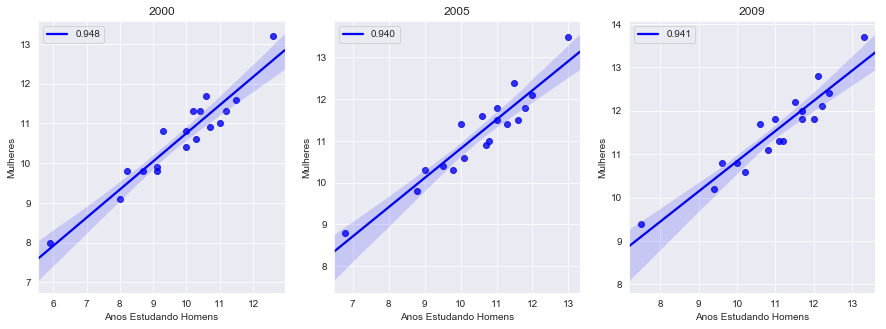

In [70]:
print()
print("Correlação da Média de Anos de Educação entre Homens e Mulheres de países da CEI")
f= plt.figure(figsize=(15,5))
plt.subplot(131)
corr3 = paises_CEI_2000["2000_Anos Educação Mulheres"].corr(paises_CEI_2000["2000_Anos Educação Homens"])
sns.regplot(paises_CEI_2000["2000_Anos Educação Mulheres"], paises_CEI_2000["2000_Anos Educação Homens"], color="b")
plt.title("2000")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr3)[:5]])
plt.grid(True)



plt.subplot(132)
corr2 = paises_CEI_2005["2005_Anos Educação Mulheres"].corr(paises_CEI_2005["2005_Anos Educação Homens"])
sns.regplot(paises_CEI_2005["2005_Anos Educação Mulheres"], paises_CEI_2005["2005_Anos Educação Homens"], color="b")
plt.title("2005")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr2)[:5]])
plt.grid(True)


plt.subplot(133)
corr1 = paises_CEI_2009["2009_Anos Educação Mulheres"].corr(paises_CEI_2009["2009_Anos Educação Homens"])
sns.regplot(paises_CEI_2009["2009_Anos Educação Mulheres"], paises_CEI_2009["2009_Anos Educação Homens"], color="b")
plt.title("2009")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr1)[:5]])
plt.grid(True)
sns.set_style('ticks')

**Correlação da Média de Anos de Educação entre Homens e Mulheres de países europeus fora da CEI**


Correlação da Média de Anos de Educação entre Homens e Mulheres de países FORA da CEI


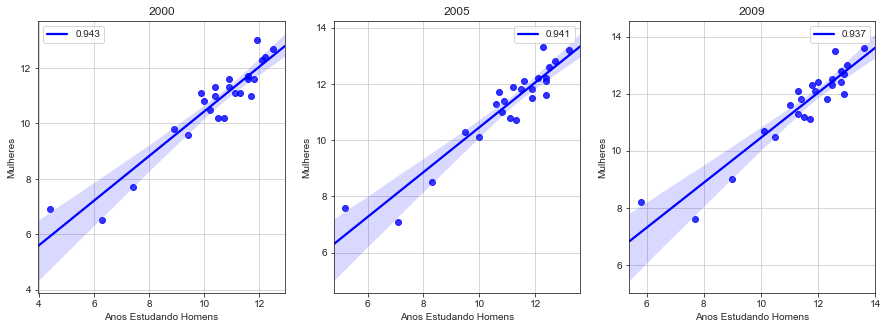

In [25]:
print()
print("Correlação da Média de Anos de Educação entre Homens e Mulheres de países FORA da CEI")
f= plt.figure(figsize=(15,5))
plt.subplot(133)
corr1 = paises_fora_2009["2009_Anos Educação Mulheres"].corr(paises_fora_2009["2009_Anos Educação Homens"])
sns.regplot(paises_fora_2009["2009_Anos Educação Mulheres"], paises_fora_2009["2009_Anos Educação Homens"], color="b")
plt.title("2009")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr1)[:5]])
plt.grid(True)

plt.subplot(132)
corr2 = paises_fora_2005["2005_Anos Educação Mulheres"].corr(paises_fora_2005["2005_Anos Educação Homens"])
sns.regplot(paises_fora_2005["2005_Anos Educação Mulheres"], paises_fora_2005["2005_Anos Educação Homens"], color="b")
plt.title("2005")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr2)[:5]])
plt.grid(True)

plt.subplot(131)
corr3 = paises_fora_2000["2000_Anos Educação Mulheres"].corr(paises_fora_2000["2000_Anos Educação Homens"])
sns.regplot(paises_fora_2000["2000_Anos Educação Mulheres"], paises_fora_2000["2000_Anos Educação Homens"], color="b")
plt.title("2000")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Mulheres")
plt.legend([str(corr3)[:5]])
plt.grid(True)


Por meio dos gráficos de dispersão, é possível perceber que há alta correlação entre o número de anos estudando de mulheres e homens, o que nos permite concluir que os países em questão possuem um alto índice de igualdade quando se tratando de educação levando em consideração os gêneros. Dessa forma, durante a análise é válido utilizar qualquer um dos parâmetros, tanto das mulheres quanto de homens, para entender a relação da educação com o desemprego de ambos os gêneros ao longo dos anos, dentre os países pertencentes e não-pertencentes a CEI. 


Correlação da Média de Anos de Educação entre Homens Taxa de Desemprego de países da CEI


Crescimento da correlação de 2000 até 2005: 728.6735592802172 %
Crescimento da correlação de 2005 até 2009: 179.37563828625096 %
Crescimento total: 1307.062847982033 %


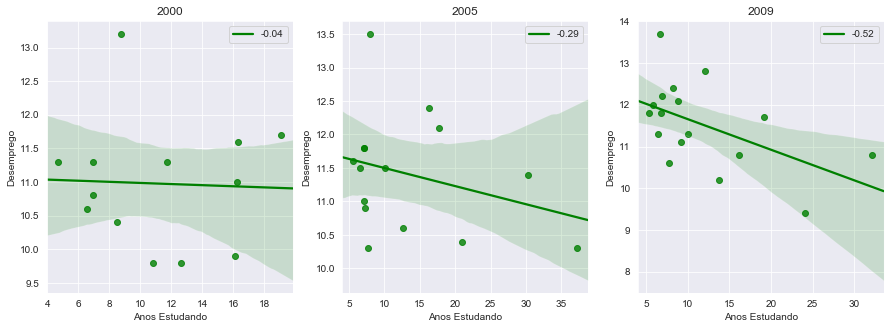

In [35]:
print()
print("Correlação da Média de Anos de Educação entre Homens Taxa de Desemprego de países da CEI")
f= plt.figure(figsize=(15,5))
plt.subplot(133)
corr1 = paises_CEI_2009["2009_Taxa de Desemprego"].corr(paises_CEI_2009["2009_Anos Educação Homens"])
sns.regplot(paises_CEI_2009["2009_Taxa de Desemprego"], paises_CEI_2009["2009_Anos Educação Homens"], color="green")
plt.title("2009")
plt.xlabel("Anos Estudando")
plt.ylabel("Desemprego")
plt.legend([str(corr1)[:5]])
plt.grid(True)

plt.subplot(132)
corr2 = paises_CEI_2005["2005_Taxa de Desemprego"].corr(paises_CEI_2005["2005_Anos Educação Homens"])
sns.regplot(paises_CEI_2005["2005_Taxa de Desemprego"], paises_CEI_2005["2005_Anos Educação Homens"], color="green")
plt.title("2005")
plt.xlabel("Anos Estudando")
plt.ylabel("Desemprego")
plt.legend([str(corr2)[:5]])
plt.grid(True)

plt.subplot(131)
corr3 = paises_CEI_2000["2000_Taxa de Desemprego"].corr(paises_CEI_2000["2000_Anos Educação Homens"])
sns.regplot(paises_CEI_2000["2000_Taxa de Desemprego"], paises_CEI_2000["2000_Anos Educação Homens"], color="green")
plt.title("2000")
plt.xlabel("Anos Estudando")
plt.ylabel("Desemprego")
plt.legend([str(corr3)[:5]])
plt.grid(True)

print()
print()
print( "Crescimento da correlação de 2000 até 2005:", ((corr2/corr3))*100,"%")
print( "Crescimento da correlação de 2005 até 2009:", ((corr1/corr2))*100,"%")
print( "Crescimento total:", ((corr1/corr3))*100,"%")

O esperado da correlação entre a varíavel desemprego e anos estudando é que seja um valor negativo, já que conforme a hipóteses inicial, quanto mais anos de escolaridade, menor seria a taxa de desemprego nos países, e isso de fato ocorre pelo o que vemos nos gráfico acima. Por meio da análise dos gráficos de dispersão, é possível perceber que a correlação entre a taxa de desemprego e a média de anos estudando dos países da CEI inicialmente é bastante baixa, de forma que poderíamos concluir que não há uma relação clara entre as variáveis em questão. Porém, é visível que há um crescimento dessa correlação ao longo dos anos: De 2000 até 2005 o aumento foi de 729% e de 2005 até 2009 de 179%. 


Correlação da Média de Anos de Educação entre Homens Taxa de Desemprego de países FORA da CEI


Crescimento da correlação de 2000 até 2005: 254.44635362940556 %
Crescimento da correlação de 2005 até 2009: 107.61664649796307 %
Crescimento total: 273.82663291231444 %


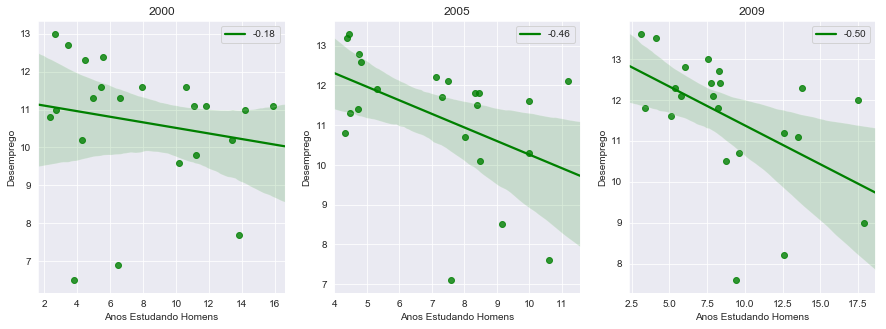

In [36]:
print()
print("Correlação da Média de Anos de Educação entre Homens Taxa de Desemprego de países FORA da CEI")
f= plt.figure(figsize=(15,5))
plt.subplot(133)
corr1 = paises_fora_2009["2009_Taxa de Desemprego"].corr(paises_fora_2009["2009_Anos Educação Homens"])
sns.regplot(paises_fora_2009["2009_Taxa de Desemprego"], paises_fora_2009["2009_Anos Educação Homens"], color="green")
plt.title("2009")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Desemprego")
plt.legend([str(corr1)[:5]])
plt.grid(True)

plt.subplot(132)
corr2 = paises_fora_2005["2005_Taxa de Desemprego"].corr(paises_fora_2005["2005_Anos Educação Homens"])
sns.regplot(paises_fora_2005["2005_Taxa de Desemprego"], paises_fora_2005["2005_Anos Educação Homens"], color="green")
plt.title("2005")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Desemprego")
plt.legend([str(corr2)[:5]])
plt.grid(True)

plt.subplot(131)
corr3 = paises_fora_2000["2000_Taxa de Desemprego"].corr(paises_fora_2000["2000_Anos Educação Homens"])
sns.regplot(paises_fora_2000["2000_Taxa de Desemprego"], paises_fora_2000["2000_Anos Educação Homens"], color="green")
plt.title("2000")
plt.xlabel("Anos Estudando Homens")
plt.ylabel("Desemprego")
plt.legend([str(corr3)[:5]])
plt.grid(True)
sns.set_style('darkgrid')

print()
print()
print( "Crescimento da correlação de 2000 até 2005:", ((corr2/corr3))*100,"%")
print( "Crescimento da correlação de 2005 até 2009:", ((corr1/corr2))*100,"%")
print( "Crescimento total:", ((corr1/corr3))*100,"%")

No caso dos países fora da CEI também notamos um crescimento na correlação das variáveis, porém esse crescimento comparado ao dos países pertencentes a organização é menor como podemos observar, já que crescimento total no tempo analisado foi respectivamente de 1307% e 273%, o que é aproximadamente 4.8 vezes maior. Com isso em mente, pode-se concluir que de fato nos países pertencentes à organização, a média de anos de escolaridade afeta negativamente a taxa de desemprego com mais intensidade do que nos países não pertencentes. 

## Conclusão

**Como que a CEI interfere no desenvolvimento da educação e queda do desemprego?**

Por meio das análises feitas ao longo do percurso, tanto dos dados quanto dos gráficos plotados, pode-se concluir que os países pertencentes a Central European Initiative de fato tiveram valores significativos de desenvolvimento da educação e a consequente queda do desempenho, por mais que não podemos afirmar com certeza que a organização foi a causa exclusiva dessas observações ou até mesmo a mais importante. 

Com relação ao desenvolvimento da educação o que foi utilizado como data foi a média dos anos estudados pelas pessoas em cada país, tanto de homens quanto de mulheres. Ao fazermos a correlação entre ambos esses dados para os diferentes anos em questão, percebemos que a correlação entre esses dados era bastante alta, tanto para os países da CEI quanto os de fora, de forma que o gênero não influenciava efetivamente esses dados, e consequentemente pode se concluir que a escolaridade na Europa era bastante igualitária. 
Além disso, por meio da análise dos histogramas e dos dados da média e mediana de ambas as variáveis em questão (escolaridade e desemprego), percebemos que tanto os indices de escolaridade quanto de desemprego nos países fora da CEI são isoladamente superiores aos dos países pertencentes à organização, o que inicialmente poderia estar relacionado a fatores históricos, como por exemplo o fato de que a maioria dos países que atualmente pertencem a CEI eram parte da união soviética ou simpatizantes, o que após a sua queda e ascensão do capitalismo, poderia ter gerado esse desfalque na economia principalmente, refletido na maior diferença entre as taxas de desemprego que podemos observar. Por outro lado, os indices de escolaridade por mais que também seja possível observar uma diferença, é muito menos evidente do que os da taxa de desemprego. 

Com isso em mente, é possível descobrir que por mais que dados isolados podem nos dar certas informações, eles nem sempre são o suficiente para realizar a melhor análise possível diante do problema, já que apenas com eles, não conseguimos perceber a evolução do que está sendo observado ao longo do tempo e a sua relação com outra variável. Dessa forma, por mais que os índices isolados dos países de fora da CEI sejam melhores do que os da organização, percebemos que a evolução do segundo grupo de países foi muito mais significativa por meio dos gráficos de dispersão que correlacionam a taxa de desemprego e os anos de escolaridade: Enquanto o crescimento total dessa correlação nos anos analisados nos países da CEI foi de 1307%, os de fora foi de 274%.

Por fim, é sempre importante levar em consideração que possuem diversos fatores que fazem com que a análise não tenha sido exatamente tão precisa, já que por mais que a correlação tenha aumentado, ela ainda não chega a ser um valor tão elevado (por volta de 0.5). Desse modo, podemos inferir que existam outras variaveis que não foram levadas em consideração na análise feita que também influenciam na taxa de desemprego. Da mesma forma, podemos afirmar que isoladamente, não é apenas o pertencimento ou não a uma determinada organização que influencia esses resultados, uma vez que como levantado anteriormente, existem inúmeros outros fatores, internos ou externos que afetam o comportamente observado. Além disso, outro empecilho para que a análise fosse o mais exata possível é a falta de dados de taxa de desemprego e escolaridade, o que limitou a quantidade de anos, que se aumentada, poderia ter garantido um melhor acompanhamento da data. 